In [1]:
import rasterio

In [2]:
import numpy as np

In [7]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    print(f"Number of bands: {dataset.count}")
    
    # Print metadata for each band
    for i in range(1, dataset.count + 1):
        band = dataset.read(i)
        print(f"Band {i}: min={band.min()}, max={band.max()}")
        print(f"Description: {dataset.descriptions[i-1]}")
    # Read the first band (assuming temperature data is in the first band)
#     temperature_data = dataset.read(1)
    
#     # Get the temperature at a specific coordinate (e.g., row -3.10719, column -60.0261)
#     temp_value = temperature_data[ -3.10719, -60.0261]
#     print(f'Temperature at (-3.10719, -60.0261): {temp_value}')
    
#     # If you want to get statistics of the temperature data
#     min_temp = np.min(temperature_data)
#     max_temp = np.max(temperature_data)
#     mean_temp = np.mean(temperature_data)
    
#     print(f'Min Temperature: {min_temp}')
#     print(f'Max Temperature: {max_temp}')
#     print(f'Mean Temperature: {mean_temp}')

Number of bands: 1
Band 1: min=nan, max=nan
Description: wc2.1_10m_tmin_2004-01.tif


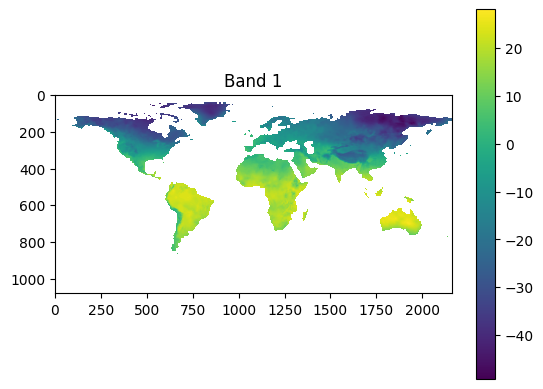

In [8]:
import matplotlib.pyplot as plt

with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    for i in range(1, dataset.count + 1):
        plt.imshow(dataset.read(i), cmap='viridis')
        plt.title(f'Band {i}')
        plt.colorbar()
        plt.show()

In [9]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)  # Mask NoData values
    print(f"Min: {band1.min()}, Max: {band1.max()}")

Min: -49.125, Max: 28.0


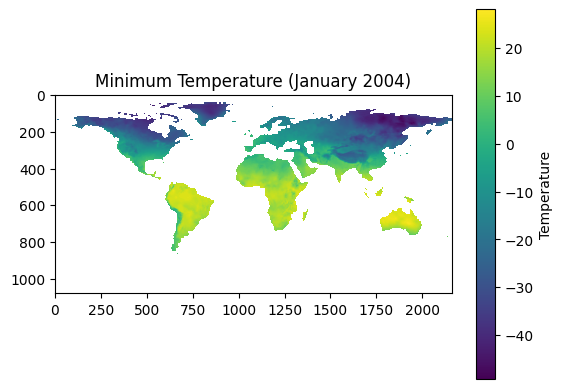

In [10]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    plt.imshow(band1, cmap='viridis')
    plt.title('Minimum Temperature (January 2004)')
    plt.colorbar(label='Temperature')
    plt.show()

In [12]:
from rasterio.transform import rowcol

# Specify the latitude and longitude of the point you are interested in
latitude = -23.55  # Example latitude (e.g., São Paulo, Brazil)
longitude = -46.63  # Example longitude

# Open the .tif file
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    # Get the affine transform of the dataset
    transform = dataset.transform
    
    # Convert latitude and longitude to row and column in the raster
    col, row = rowcol(transform, longitude, latitude)
    
    # Read the value at the raster coordinate
    temperature_value = dataset.read(1)[row, col]
    
    print(f"Temperature at ({latitude}, {longitude}): {temperature_value}")

Temperature at (-23.55, -46.63): 13.0


In [15]:
latitude = -3.1190  # Manaus latitude
longitude = -60.0217  # Manaus longitude

# Open the .tif file
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    # Get the affine transform of the dataset
    transform = dataset.transform
    
    # Convert latitude and longitude to row and column in the raster
    col, row = rowcol(transform, longitude, latitude)
    
    # Read the value at the raster coordinate
    temperature_value = dataset.read(1)[row, col]
    
    print(f"Temperature at Manaus ({latitude}, {longitude}): {temperature_value}")

Temperature at Manaus (-3.119, -60.0217): nan


In [16]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    print(f"NoData Value: {dataset.nodata}")

NoData Value: nan


In [17]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    print(f"CRS: {dataset.crs}")

CRS: EPSG:4326


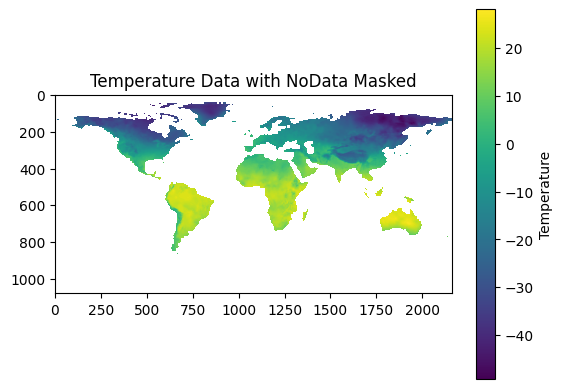

In [18]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)  # Mask NoData values
    plt.imshow(band1, cmap='viridis')
    plt.title('Temperature Data with NoData Masked')
    plt.colorbar(label='Temperature')
    plt.show()

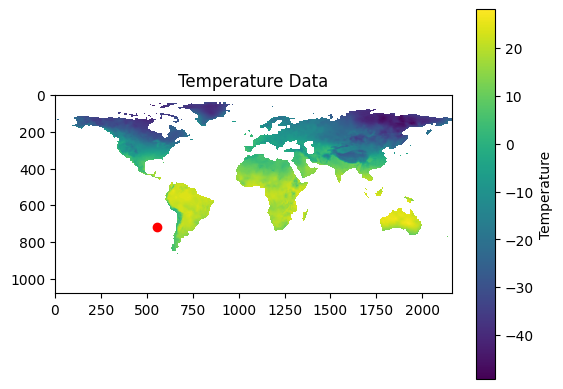

In [19]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    plt.imshow(band1, cmap='viridis')
    plt.title('Temperature Data')
    plt.colorbar(label='Temperature')
    plt.scatter(col, row, c='red')  # Plot the point of interest
    plt.show()

In [20]:
print(f"Affine Transformation: {dataset.transform}")

Affine Transformation: | 0.17, 0.00,-180.00|
| 0.00,-0.17, 90.00|
| 0.00, 0.00, 1.00|


In [21]:
bounds = dataset.bounds
print(f"Raster Bounds: {bounds}")

Raster Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


In [22]:
col, row = rowcol(dataset.transform, longitude, latitude)
print(f"Column: {col}, Row: {row}")

Column: 558, Row: 719


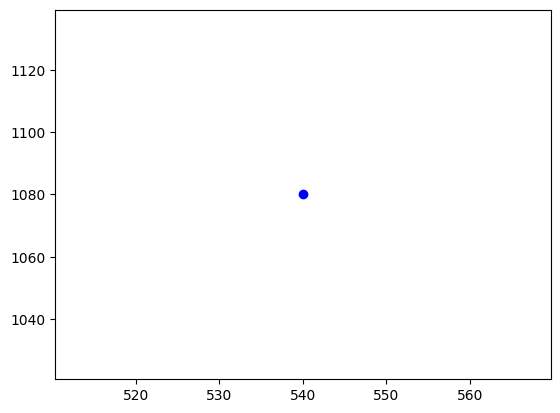

In [23]:
center_lat = (bounds.top + bounds.bottom) / 2
center_lon = (bounds.left + bounds.right) / 2

col_center, row_center = rowcol(dataset.transform, center_lon, center_lat)
plt.scatter(col_center, row_center, c='blue')  # Plot the center point of the raster
plt.show()

In [25]:
from rasterio.transform import xy

# Convert row and column back to latitude and longitude
lon, lat = xy(dataset.transform, row, col)
print(f"Converted Longitude: {lon}, Latitude: {lat}")

Converted Longitude: -86.91666666666667, Latitude: -29.916666666666657


In [27]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    # Use known coordinates for Manaus
    latitude = -3.1190
    longitude = -60.0217

    # Convert latitude and longitude to column and row
    col, row = rowcol(dataset.transform, longitude, latitude)
    
    # Convert back to geographic coordinates to verify
    lon, lat = xy(dataset.transform, row, col)
    
    print(f"Original Longitude: {longitude}, Latitude: {latitude}")
    print(f"Calculated Column: {col}, Row: {row}")
    print(f"Converted Longitude: {lon}, Latitude: {lat}")

Original Longitude: -60.0217, Latitude: -3.119
Calculated Column: 558, Row: 719
Converted Longitude: -86.91666666666667, Latitude: -29.916666666666657


In [28]:
print(f"Affine Transformation: {dataset.transform}")

Affine Transformation: | 0.17, 0.00,-180.00|
| 0.00,-0.17, 90.00|
| 0.00, 0.00, 1.00|


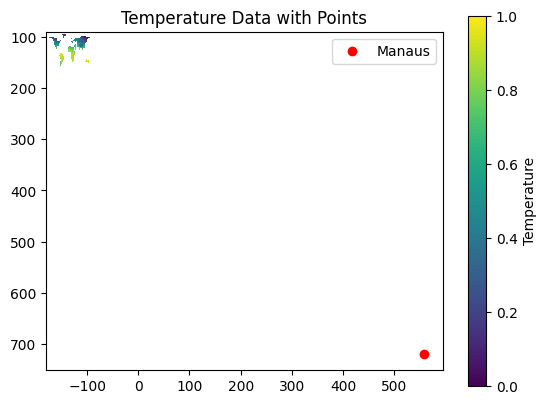

In [29]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    plt.imshow(band1, cmap='viridis', extent=dataset.bounds)
    plt.title('Temperature Data with Points')

    # Convert and plot Manaus
    col, row = rowcol(dataset.transform, longitude, latitude)
    plt.scatter(col, row, color='red', label='Manaus')

    plt.colorbar(label='Temperature')
    plt.legend()
    plt.show()

In [30]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    print(f"Affine Transformation: {dataset.transform}")
    print(f"CRS: {dataset.crs}")

Affine Transformation: | 0.17, 0.00,-180.00|
| 0.00,-0.17, 90.00|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326


In [31]:
bounds = dataset.bounds
print(f"Raster Bounds: {bounds}")

Raster Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


In [32]:
# Test with additional known points
test_coords = [(-90, 0), (0, 0), (90, 0), (0, 90)]
for lon, lat in test_coords:
    col, row = rowcol(dataset.transform, lon, lat)
    conv_lon, conv_lat = xy(dataset.transform, row, col)
    print(f"Original Longitude: {lon}, Latitude: {lat}")
    print(f"Calculated Column: {col}, Row: {row}")
    print(f"Converted Longitude: {conv_lon}, Latitude: {conv_lat}")

Original Longitude: -90, Latitude: 0
Calculated Column: 540, Row: 540
Converted Longitude: -89.91666666666667, Latitude: -0.0833333333333286
Original Longitude: 0, Latitude: 0
Calculated Column: 540, Row: 1080
Converted Longitude: -89.91666666666667, Latitude: -90.08333333333331
Original Longitude: 90, Latitude: 0
Calculated Column: 540, Row: 1620
Converted Longitude: -89.91666666666667, Latitude: -180.08333333333331
Original Longitude: 0, Latitude: 90
Calculated Column: 0, Row: 1080
Converted Longitude: -179.91666666666666, Latitude: -90.08333333333331


Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
Column: 558, Row: 719


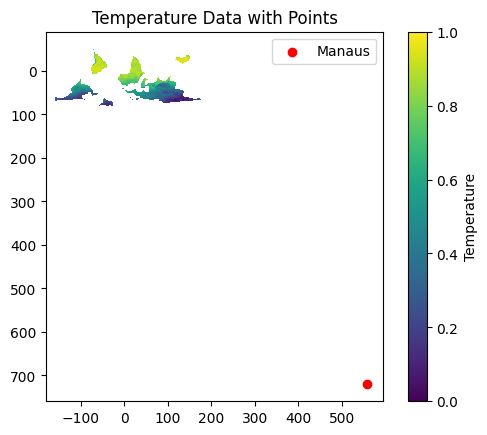

In [33]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    bounds = dataset.bounds

    # Print bounds for verification
    print(f"Bounds: {bounds}")

    plt.imshow(band1, cmap='viridis', extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
    plt.title('Temperature Data with Points')

    # Convert and plot Manaus
    latitude = -3.1190
    longitude = -60.0217
    col, row = rowcol(dataset.transform, longitude, latitude)
    
    # Check row and col values for correct plotting
    print(f"Column: {col}, Row: {row}")
    plt.scatter(col, row, color='red', label='Manaus')

    plt.colorbar(label='Temperature')
    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to match the coordinate system
    plt.show()

Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
Column: 558, Row: 719


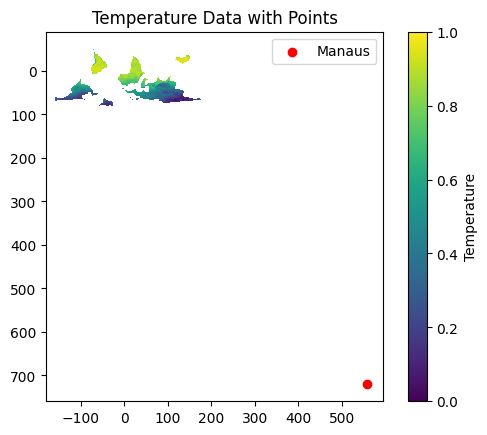

In [34]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    bounds = dataset.bounds

    # Print bounds for verification
    print(f"Bounds: {bounds}")

    plt.imshow(band1, cmap='viridis', extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
    plt.title('Temperature Data with Points')

    # Convert and plot Manaus
    latitude = -3.1190
    longitude = -60.0217
    col, row = rowcol(dataset.transform, longitude, latitude)
    
    # Check row and col values for correct plotting
    print(f"Column: {col}, Row: {row}")
    plt.scatter(col, row, color='red', label='Manaus')

    plt.colorbar(label='Temperature')
    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to match the coordinate system
    plt.show()

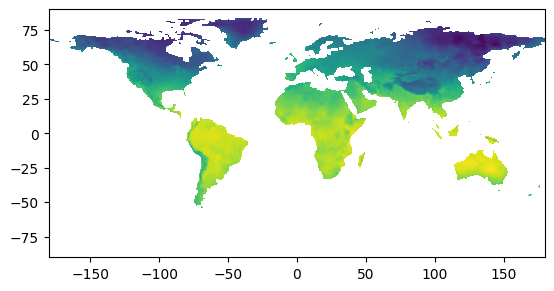

In [40]:
plt.imshow(band1, cmap='viridis', extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
plt.show()

In [37]:
# Convert back to geographic coordinates
lon, lat = xy(dataset.transform, row, col)
print(f"Converted Longitude: {lon}, Latitude: {lat}")

Converted Longitude: -86.91666666666667, Latitude: -29.916666666666657


In [38]:
test_coords = [(-90, 0), (0, 0), (90, 0), (0, 90)]
for lon, lat in test_coords:
    col, row = rowcol(dataset.transform, lon, lat)
    conv_lon, conv_lat = xy(dataset.transform, row, col)
    print(f"Original Longitude: {lon}, Latitude: {lat}")
    print(f"Calculated Column: {col}, Row: {row}")
    print(f"Converted Longitude: {conv_lon}, Latitude: {conv_lat}")

Original Longitude: -90, Latitude: 0
Calculated Column: 540, Row: 540
Converted Longitude: -89.91666666666667, Latitude: -0.0833333333333286
Original Longitude: 0, Latitude: 0
Calculated Column: 540, Row: 1080
Converted Longitude: -89.91666666666667, Latitude: -90.08333333333331
Original Longitude: 90, Latitude: 0
Calculated Column: 540, Row: 1620
Converted Longitude: -89.91666666666667, Latitude: -180.08333333333331
Original Longitude: 0, Latitude: 90
Calculated Column: 0, Row: 1080
Converted Longitude: -179.91666666666666, Latitude: -90.08333333333331


Column: 558, Row: 719


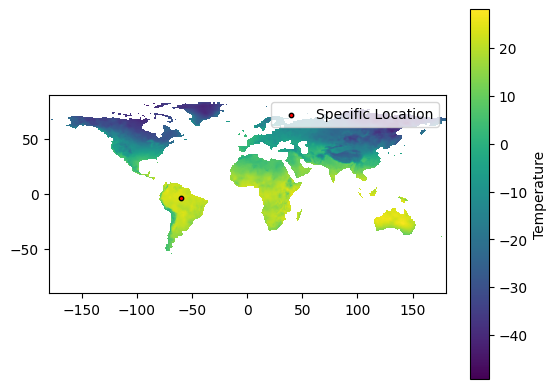

In [42]:
# Define the specific geographic coordinate you want to mark
longitude = -60.0217  # Example longitude for Manaus
latitude = -3.1190    # Example latitude for Manaus

# Open the raster file
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    bounds = dataset.bounds
    
    # Convert geographic coordinates to pixel (row, column) coordinates
    col, row = rowcol(dataset.transform, longitude, latitude)
    
    # Print coordinates for verification
    print(f"Column: {col}, Row: {row}")

    # Plot the raster data
    plt.imshow(band1, cmap='viridis', extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
    plt.colorbar(label='Temperature')
    
    # Mark the specific geographic coordinate with a red dot
    plt.scatter(longitude, latitude, color='red', label='Specific Location', s=10, edgecolor='black')
    
    # Add a legend and show the plot
    plt.legend()
    plt.show()

In [43]:
# Define the specific geographic coordinate
longitude = -60.0217  # Example longitude for Manaus
latitude = -3.1190    # Example latitude for Manaus

# Open the raster file
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    # Convert geographic coordinates to pixel (row, column) coordinates
    col, row = rowcol(dataset.transform, longitude, latitude)
    
    # Read the temperature value at the pixel coordinates
    band1 = dataset.read(1, masked=True)
    
    # Extract the temperature value
    temperature_value = band1[row, col]
    
    # Handle NoData values
    if temperature_value == dataset.nodata:
        temperature_value = 'NoData'  # Or handle as needed

    # Print the temperature value
    print(f"Temperature at longitude {longitude}, latitude {latitude}: {temperature_value}")

Temperature at longitude -60.0217, latitude -3.119: --


In [44]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    width = dataset.width
    height = dataset.height
    print(f"Raster Dimensions: Width = {width}, Height = {height}")

    col, row = rowcol(dataset.transform, longitude, latitude)
    print(f"Calculated Column: {col}, Row: {row}")
    
    if 0 <= col < width and 0 <= row < height:
        print("Coordinates are within valid range.")
    else:
        print("Coordinates are out of bounds.")

Raster Dimensions: Width = 2160, Height = 1080
Calculated Column: 558, Row: 719
Coordinates are within valid range.


In [46]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    print(f"Data Type: {band1.dtype}")
    print(f"Min Value: {band1.min()}, Max Value: {band1.max()}")

Data Type: float32
Min Value: -49.125, Max Value: 28.0


In [47]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    nodata_value = dataset.nodata
    print(f"NoData Value: {nodata_value}")

    band1 = dataset.read(1, masked=True)
    col, row = rowcol(dataset.transform, longitude, latitude)

    if 0 <= col < dataset.width and 0 <= row < dataset.height:
        temperature_value = band1[row, col]
        if temperature_value == nodata_value:
            temperature_value = 'NoData'
    else:
        temperature_value = 'Out of Bounds'

    print(f"Temperature at longitude {longitude}, latitude {latitude}: {temperature_value}")

NoData Value: nan
Temperature at longitude -60.0217, latitude -3.119: --


In [48]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    print(f"Affine Transformation: {dataset.transform}")

    # Convert pixel coordinates back to geographic coordinates
    lon, lat = xy(dataset.transform, row, col)
    print(f"Converted Longitude: {lon}, Latitude: {lat}")

Affine Transformation: | 0.17, 0.00,-180.00|
| 0.00,-0.17, 90.00|
| 0.00, 0.00, 1.00|
Converted Longitude: -86.91666666666667, Latitude: -29.916666666666657


In [49]:
# Define the specific geographic coordinate
longitude = -86.91667  # Example converted longitude for Manaus
latitude = -29.91667   # Example converted latitude for Manaus

# Open the raster file
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    # Convert geographic coordinates to pixel (row, column) coordinates
    col, row = rowcol(dataset.transform, longitude, latitude)
    
    # Read the temperature value at the pixel coordinates
    band1 = dataset.read(1, masked=True)
    
    # Extract the temperature value
    temperature_value = band1[row, col]
    
    # Handle NoData values
    if temperature_value == dataset.nodata:
        temperature_value = 'NoData'  # Or handle as needed

    # Print the temperature value
    print(f"Temperature at longitude {longitude}, latitude {latitude}: {temperature_value}")

Temperature at longitude -86.91667, latitude -29.91667: 24.3125


Converted Longitude: -60.08333333333334, Latitude: -3.0833333333333286


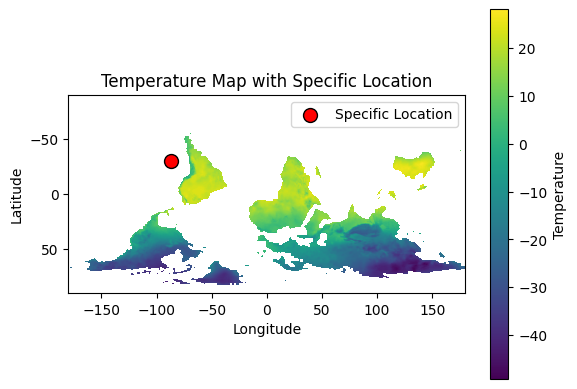

In [50]:
# Define the specific geographic coordinate
longitude = -86.91667  # Example converted longitude for Manaus
latitude = -29.91667   # Example converted latitude for Manaus

# Open the raster file
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    bounds = dataset.bounds
    transform = dataset.transform
    
    # Convert geographic coordinates to pixel (row, column) coordinates
    col, row = rowcol(transform, longitude, latitude)
    
    # Convert pixel coordinates back to geographic coordinates for verification
    conv_lon, conv_lat = xy(transform, row, col)
    print(f"Converted Longitude: {conv_lon}, Latitude: {conv_lat}")
    
    # Plot the raster data
    plt.imshow(band1, cmap='viridis', extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
    plt.colorbar(label='Temperature')
    
    # Plot the specific geographic coordinate with a red dot
    plt.scatter(longitude, latitude, color='red', label='Specific Location', s=100, edgecolor='black')
    
    # Add a legend and show the plot
    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to match the coordinate system
    plt.title('Temperature Map with Specific Location')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

In [51]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    col, row = rowcol(dataset.transform, longitude, latitude)
    print(f"Column: {col}, Row: {row}")

    width = dataset.width
    height = dataset.height
    print(f"Raster Dimensions: Width = {width}, Height = {height}")

    if 0 <= col < width and 0 <= row < height:
        print("Pixel coordinates are within valid range.")
    else:
        print("Pixel coordinates are out of bounds.")

Column: 719, Row: 558
Raster Dimensions: Width = 2160, Height = 1080
Pixel coordinates are within valid range.


In [52]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    nodata_value = dataset.nodata
    print(f"NoData Value: {nodata_value}")

    # Print min and max values in the raster
    print(f"Min Value: {band1.min()}, Max Value: {band1.max()}")

NoData Value: nan
Min Value: -49.125, Max Value: 28.0


In [53]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    col, row = rowcol(dataset.transform, longitude, latitude)

    if 0 <= col < dataset.width and 0 <= row < dataset.height:
        temperature_value = band1[row, col]
        if temperature_value == dataset.nodata:
            temperature_value = 'NoData'
        print(f"Temperature at longitude {longitude}, latitude {latitude}: {temperature_value}")
    else:
        print("Coordinates are out of bounds.")

Temperature at longitude -86.91667, latitude -29.91667: 24.3125


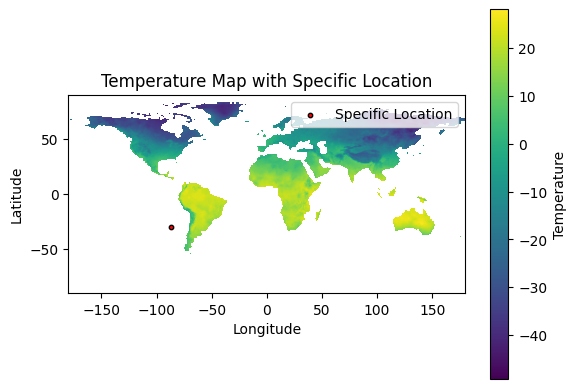

In [55]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    bounds = dataset.bounds

    plt.imshow(band1, cmap='viridis', extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
    plt.colorbar(label='Temperature')

    # Mark the specific geographic coordinate with a red dot
    plt.scatter(longitude, latitude, color='red', label='Specific Location', s=10, edgecolor='black')

    plt.legend()
    plt.title('Temperature Map with Specific Location')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.gca()#.invert_yaxis()  # Invert y-axis to match the coordinate system
    plt.show()

In [56]:
longitude_manaus = -60.0217  # Example longitude for Manaus
latitude_manaus = -3.1190    # Example latitude for Manaus

with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    col, row = rowcol(dataset.transform, longitude_manaus, latitude_manaus)

    if 0 <= col < dataset.width and 0 <= row < dataset.height:
        temperature_value = band1[row, col]
        if temperature_value == dataset.nodata:
            temperature_value = 'NoData'
        print(f"Temperature at longitude {longitude_manaus}, latitude {latitude_manaus}: {temperature_value}")
    else:
        print("Coordinates are out of bounds.")

Temperature at longitude -60.0217, latitude -3.119: --


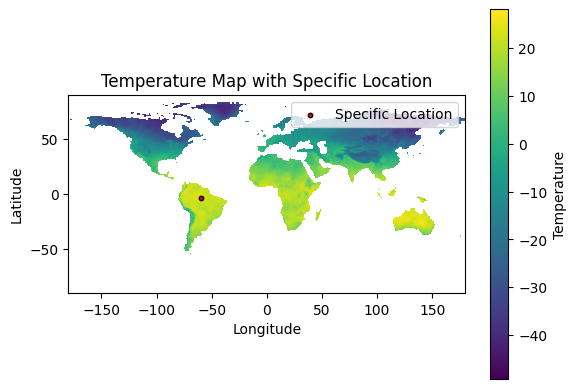

In [57]:
with rasterio.open('wc2.1_10m_tmin_2004-01.tif') as dataset:
    band1 = dataset.read(1, masked=True)
    bounds = dataset.bounds

    plt.imshow(band1, cmap='viridis', extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
    plt.colorbar(label='Temperature')

    # Mark the specific geographic coordinate with a red dot
    plt.scatter(longitude_manaus, latitude_manaus, color='red', label='Specific Location', s=10, edgecolor='black')

    plt.legend()
    plt.title('Temperature Map with Specific Location')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.gca()#.invert_yaxis()  # Invert y-axis to match the coordinate system
    plt.show()